This computation was originally done in Google Colab, and therefore our R was interpereted through python to allow us to mount a drive for storage of data and packages.

# Replicating Lake et al.

https://www.nature.com/articles/s41467-019-10861-2

For Lake et al., all we needed to do was load in the data that they shared with us along with the metadata.

Download the data from [here](https://drive.google.com/file/d/1vL86XNBrMjZalnv4eOXdGbN0rsQ3XubX/view?usp=sharing) and the metadata file [here](https://drive.google.com/file/d/1MNf9wq4dn9b9eA-07qikGYLRo_vG64qa/view?usp=sharing)

In [ ]:
%reload_ext rpy2.ipython
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%%R
lib_loc <- "/content/drive/MyDrive/r-lib"
library(Seurat, lib = lib_loc)

R[write to console]: 
Seurat v4 will be going to CRAN in the near future;
 for more details, please visit https://satijalab.org/seurat/v4_changes




In [ ]:
%%R
load('/content/drive/Shareddrives/Research - Stephen/Organized Files/Datasets/Lake/Data/Adult_Normal_Kidney_snDrop_Lake2019_NCOMM_Seuratv3.Robj')

In [ ]:
%%R
levels(ank.3)

 [1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29" "30"


After loading the data, we annotated with given metadata from the second file and plot the UMAP.

In [ ]:
%%R
labels <- read.delim('/content/drive/Shareddrives/Research - Stephen/Organized Files/Datasets/Lake/Data/BlueLakeClusters.txt', header = FALSE)
nam <- labels$V1
names(nam) <- levels(ank.3)
ank.3 <- RenameIdents(ank.3, nam)

In [ ]:
%%R
plot <- DimPlot(ank.3)+ NoLegend()

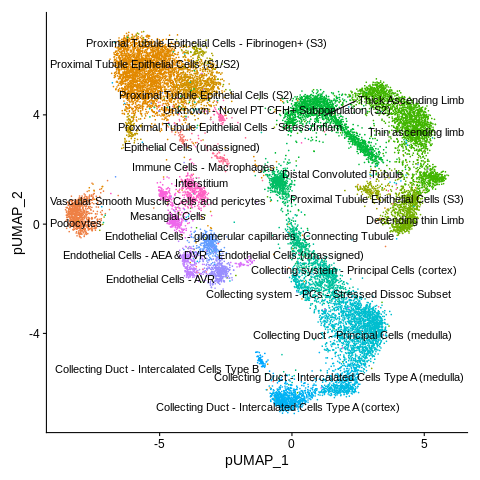

In [ ]:
%%R
LabelClusters(plot, id = 'ident')

In [ ]:
%%R
load('lakecolab')

In [ ]:
%%R
save(ank.3, file = '/content/drive/MyDrive/test')

In [ ]:
%%R
saveRDS(ank.3, '/content/drive/Shareddrives/Research - Stephen/Project Final Directory/Dataset Replications/Lake/Seurat Object/Lake.RDS')

In [ ]:
%%R
load('/content/drive/Shareddrives/Research - Stephen/Project Final Directory/Dataset Replications/Lake/Seurat Object/lakecolab')

In [ ]:
%%R
ls()

[1] "ank.3"   "lib_loc"


Here is a list of the 27 cell types in the data:

In [ ]:
%%R
ank.3 <- RenameIdents(ank.3, nam)

 [1] "Epithelial Cells (unassigned)"                        
 [2] "Podocytes"                                            
 [3] "Proximal Tubule Epithelial Cells (S1/S2)"             
 [4] "Proximal Tubule Epithelial Cells (S2)"                
 [5] "Proximal Tubule Epithelial Cells - Stress/Inflam"     
 [6] "Proximal Tubule Epithelial Cells - Fibrinogen+ (S3)"  
 [7] "Proximal Tubule Epithelial Cells (S3)"                
 [8] "Decending thin Limb"                                  
 [9] "Thin ascending limb"                                  
[10] "Thick Ascending Limb"                                 
[11] "Distal Convoluted Tubule"                             
[12] "Connecting Tubule"                                    
[13] "Collecting system - Principal Cells (cortex)"         
[14] "Collecting system - PCs - Stressed Dissoc Subset"     
[15] "Collecting Duct - Principal Cells (medulla)"          
[16] "Collecting Duct - Intercalated Cells Type A (medulla)"
[17] "Collecting Duct - 

In [ ]:
%%R
colnames(ank.3@meta.data)

 [1] "orig.ident"                "nCount_RNA"               
 [3] "nFeature_RNA"              "library"                  
 [5] "patient"                   "tissue_processing"        
 [7] "tissue_collection"         "tissue_type"              
 [9] "sex"                       "experiment"               
[11] "cluster_ID"                "tissue_source"            
[13] "tissue_processing_general" "tissue_processing_short"  
[15] "percent_mito"             
